# NumPy 

NumPy (or Numpy) is a Linear Algebra Library for Python.  
It is used by almost all of the libraries in the PyData Ecosystem as one of their main building blocks.

Numpy is also incredibly fast, as it has bindings to C libraries. For more info on why you would want to use Arrays instead of lists, check out this great [StackOverflow post](http://stackoverflow.com/questions/993984/why-numpy-instead-of-python-lists).

We will only learn the basics of NumPy.  
Numpy comes preinstalled with Anaconda and IBM DSX. If for some reason it isn't installed, you can install it from your command prompt by typing:

If you have Anaconda:
    
    conda install numpy
    
If you do not have Anaconda:
    
    pip install numpy

## Using NumPy

Once you've installed NumPy you can import it as a library:

In [1]:
import numpy as np

# Numpy Arrays 
### (taken from https://github.com/jakevdp/PythonDataScienceHandbook)

NumPy arrays are the main way we will use Numpy throughout the course. Numpy arrays essentially come in two flavors: vectors and matrices. Vectors are strictly 1-d arrays and matrices are 2-d (but you should note a matrix can still have only one row or one column).

Remember that in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred. This means, for example, that we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

Here we've switched the contents of x from an integer to a string. The same thing in C would lead (depending on compiler settings) to a compilation error or other unintented consequences:
```python
/* C code */
int x = 4;
x = "four";  // FAILS
```

This sort of flexibility is one piece that makes Python and other dynamically-typed languages convenient and easy to use. Understanding how this works is an important piece of learning to analyze data efficiently and effectively with Python. But what this type-flexibility also points to is the fact that Python variables are more than just their value; they also contain extra information about the type of the value.

## A Python Integer Is More Than Just an Integer

The standard Python implementation is written in C.
This means that every Python object is simply a cleverly-disguised C structure, which contains not only its value, but other information as well. For example, when we define an integer in Python, such as ``x = 10000``, ``x`` is not just a "raw" integer. It's actually a pointer to a compound C structure, which contains several values.
Looking through the Python 3.4 source code, we find that the integer (long) type definition effectively looks like this (once the C macros are expanded):

```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3.4 actually contains four pieces:

- ``ob_refcnt``, a reference count that helps Python silently handle memory allocation and deallocation
- ``ob_type``, which encodes the type of the variable
- ``ob_size``, which specifies the size of the following data members
- ``ob_digit``, which contains the actual integer value that we expect the Python variable to represent.

This means that there is some overhead in storing an integer in Python as compared to an integer in a compiled language like C, as illustrated in the following figure:

![Integer Memory Layout](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/cint_vs_pyint.png?raw=true)

Here ``PyObject_HEAD`` is the part of the structure containing the reference count, type code, and other pieces mentioned before.

Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value.
A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.
This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically.
All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects.

## A Python List Is More Than Just a List

Let's consider now what happens when we use a Python data structure that holds many Python objects.
The standard mutable multi-element container in Python is the list.
We can create a list of integers as follows:

In [2]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
type(L[0])

int

Or, similarly, a list of strings:

In [4]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
type(L2[0])

str

Because of Python's dynamic typing, we can even create heterogeneous lists:

In [6]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object.
In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.
The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

![Array Memory Layout](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/array_vs_list.png?raw=true)

At the implementation level, the array essentially contains a single pointer to one contiguous block of data.
The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier.
Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type.
Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

## Fixed-Type Arrays in Python

Python offers several different options for storing data in efficient, fixed-type data buffers.
The built-in ``array`` module (available since Python 3.3) can be used to create dense arrays of a uniform type:

In [7]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here ``'i'`` is a type code indicating the contents are integers.

Much more useful, however, is the ``ndarray`` object of the NumPy package.
While Python's ``array`` object provides efficient storage of array-based data, NumPy adds to this efficient *operations* on that data.
We will explore these operations in later sections; here we'll demonstrate several ways of creating a NumPy array.

We'll start with the standard NumPy import, under the alias ``np``:

## Creating NumPy Arrays

### From a Python List

We can create an array by directly converting a list or list of lists:

In [7]:
my_list = [1,3.6,3]
my_list

[1, 3.6, 3]

In [8]:
np.array(my_list)

array([ 1. ,  3.6,  3. ])

In [10]:
my_matrix = [[1,2,3],[4,5,6],[7,8,9]]
my_matrix

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [11]:
np.array(my_matrix)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Built-in Methods

There are lots of built-in ways to generate Arrays:

### arange

Return evenly spaced values within a given interval.

In [12]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

### zeros and ones

Generate arrays of zeros or ones

In [14]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [15]:
np.zeros((5,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [16]:
np.ones(3)

array([ 1.,  1.,  1.])

In [17]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

### linspace
Return evenly spaced numbers over a specified interval.

In [18]:
np.linspace(0,10,3)

array([  0.,   5.,  10.])

In [19]:
np.linspace(0,10,50)

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])

## eye

Creates an identity matrix

In [20]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## Random 

Numpy also has lots of ways to create random number arrays:

### rand
Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

In [21]:
np.random.rand(2)

array([ 0.80435157,  0.63107488])

In [22]:
np.random.rand(5,5)

array([[ 0.77931844,  0.43500817,  0.45646757,  0.34842049,  0.5161792 ],
       [ 0.17608798,  0.89787177,  0.67272645,  0.99214867,  0.57017273],
       [ 0.56976272,  0.13418419,  0.09751937,  0.85117367,  0.94392927],
       [ 0.93305628,  0.62590926,  0.02011572,  0.61353277,  0.63612799],
       [ 0.75989929,  0.17803083,  0.12674002,  0.1670045 ,  0.48904988]])

### randn

Return a sample (or samples) from the "standard normal" distribution. Unlike rand which is uniform:

In [23]:
np.random.randn(2)

array([ 0.2381372 , -0.87555609])

In [24]:
np.random.randn(5,5)

array([[ -2.71017271e-01,   3.74565200e-01,   5.87391555e-01,
         -2.04009036e+00,  -3.40468694e-01],
       [  5.55911069e-02,   2.96216559e-01,   2.15480901e-01,
         -4.68081928e-01,  -5.57089608e-01],
       [  7.37337488e-01,  -6.64800381e-01,   5.01662523e-01,
         -1.80423438e-01,  -2.37042670e-01],
       [  6.53875292e-02,   3.33917511e-01,   1.03602906e+00,
          1.64268917e+00,   2.90117415e-01],
       [  1.62101262e-01,  -1.20846802e+00,  -1.01854877e-03,
         -1.40530666e-02,   1.04879194e+00]])

### randint
Return random integers from `low` (inclusive) to `high` (exclusive).

In [25]:
np.random.randint(1,100)

46

In [26]:
np.random.randint(1,100,10)

array([33, 47, 23, 48, 36,  9,  2, 88, 98, 51])

## Array Attributes and Methods

Let's discuss some useful attributes and methods or an array:

In [27]:
arr = np.arange(25)
ranarr = np.random.randint(0,50,10)

In [28]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [29]:
ranarr

array([42, 44, 27, 24,  2, 37, 45, 31, 25, 27])

### Reshape
Returns an array containing the same data with a new shape.

In [30]:
arr.reshape(5,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

### max, min, argmax, argmin

These are useful methods for finding max or min values. Or to find their index locations using argmin or argmax

In [31]:
ranarr

array([42, 44, 27, 24,  2, 37, 45, 31, 25, 27])

In [32]:
ranarr.max()

45

In [33]:
ranarr.argmax()

6

In [34]:
ranarr.min()

2

In [35]:
ranarr.argmin()

4

### Shape

Shape is an attribute that arrays have (note that it's an attribute and not a method, so it doesn't take parenthesis):

In [10]:
# Vector
arr = np.arange(25)
arr.shape

(25L,)

In [12]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [37]:
# Notice the two sets of brackets
arr.reshape(1,25)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]])

In [13]:
arr.reshape(1,25).shape

(1L, 25L)

In [15]:
arr.reshape(25)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [16]:
arr.reshape(25,1).shape

(25L, 1L)

### dtype

You can also grab the data type of the object in the array:

In [17]:
arr.dtype

dtype('int32')

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

==========================================================================================================================

# NumPy Indexing and Selection

In this lecture we will discuss how to select elements or groups of elements from an array.

In [18]:
#Creating sample array
arr = np.arange(0,11)

In [19]:
#Show
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Bracket Indexing and Selection
The simplest way to pick one or some elements of an array looks very similar to python lists:

In [20]:
#Get a value at an index
arr[8]

8

In [21]:
#Get values in a range
arr[1:5]

array([1, 2, 3, 4])

In [46]:
#Get values in a range
arr[0:5]

array([0, 1, 2, 3, 4])

## Indexing a 2D array (matrices)

The general format is **arr_2d[row][col]** or **arr_2d[row,col]**. I recommend usually using the comma notation for clarity.

In [22]:
arr_2d = np.array(([5,10,15],[20,25,30],[35,40,45]))

#Show
arr_2d

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

In [23]:
#Indexing row
arr_2d[1]

array([20, 25, 30])

In [24]:
# Format is arr_2d[row][col] or arr_2d[row,col]

# Getting individual element value
arr_2d[1][0]

20

In [25]:
# Getting individual element value
arr_2d[1,0]

20

In [26]:
# 2D array slicing

#Shape (2,2) from top right corner
arr_2d[:2,1:]

array([[10, 15],
       [25, 30]])

In [52]:
#Shape bottom row
arr_2d[2]

array([35, 40, 45])

In [53]:
#Shape bottom row
arr_2d[2,:]

array([35, 40, 45])

### Fancy Indexing

Fancy indexing allows you to select entire rows or columns out of order. To see it in action, let's quickly build out a numpy array:

In [54]:
#Set up matrix
arr2d = np.zeros((10,10))

In [55]:
#Length of array
arr_length = arr2d.shape[1]

In [56]:
#Set up array
for i in range(arr_length):
    arr2d[i] = i
    
arr2d

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.]])

Fancy indexing allows the following

In [57]:
arr2d[[2,4,6,8]]

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.]])

In [27]:
whos

Variable   Type       Data/Info
-------------------------------
L          list       n=10
arr        ndarray    11L: 11 elems, type `int32`, 44 bytes
arr_2d     ndarray    3Lx3L: 9 elems, type `int32`, 36 bytes
my_list    list       n=3
np         module     <module 'numpy' from 'C:\<...>ages\numpy\__init__.pyc'>


In [58]:
# Allows in any order
arr2d[[6,4,2,7]]

array([[ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.]])

### More Indexing Help
Indexing a 2d matrix can be a bit confusing at first, especially when you start to add in step size. Try google image searching NumPy indexing to fins useful images, like this one:

<img src= 'http://memory.osu.edu/classes/python/_images/numpy_indexing.png' width=500/>

# Selection

Let's briefly go over how to use brackets for selection based off of comparison operators.

In [59]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [60]:
arr > 4

array([False, False, False, False,  True,  True,  True,  True,  True,  True], dtype=bool)

In [61]:
bool_arr = arr>4

In [62]:
bool_arr

array([False, False, False, False,  True,  True,  True,  True,  True,  True], dtype=bool)

In [63]:
arr[bool_arr]

array([ 5,  6,  7,  8,  9, 10])

In [64]:
arr[arr>2]

array([ 3,  4,  5,  6,  7,  8,  9, 10])

In [65]:
x = 2
arr[arr>x]

array([ 3,  4,  5,  6,  7,  8,  9, 10])

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [28]:
x = np.array([[3,  1,  8],  [4,  2,  7],  [9, 6, 10]])
print(x)

[[ 3  1  8]
 [ 4  2  7]
 [ 9  6 10]]


In [29]:
x < 6

array([[ True,  True, False],
       [ True,  True, False],
       [False, False, False]], dtype=bool)

### Counting entries

To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [88]:
# how many values less than 6?
np.count_nonzero(x < 6)

4

We see that there are eight array entries that are less than 6.
Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``:

In [89]:
np.sum(x < 6)

4

The benefit of ``sum()`` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [34]:
# how many values less than 6 in each row?
np.sum(x < 4, axis=1)

array([2, 1, 0])

This counts the number of values less than 6 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) ``np.any`` or ``np.all``:

In [91]:
# are there any values greater than 8?
np.any(x > 8)

True

In [92]:
# are there any values less than zero?
np.any(x < 0)

False

In [93]:
# are all values less than 10?
np.all(x < 10)

False

In [94]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [95]:
# are all values in each row less than 4?
np.all(x < 8, axis=1)

array([False,  True, False], dtype=bool)

Here all the elements in the first and third rows are less than 8, while this is not the case for the second row.

Finally, a quick warning: Python has built-in ``sum()``, ``any()``, and ``all()`` functions. These have a different syntax than the NumPy versions, and in particular will fail or produce unintended results when used on multidimensional arrays. Be sure that you are using ``np.sum()``, ``np.any()``, and ``np.all()`` for these examples!

### Boolean operators

We've already seen how we might count, say, all days with rain less than four inches, or all days with rain greater than two inches.
But what if we want to know about all days with rain less than four inches and greater than one inch?
This is accomplished through Python's *bitwise logic operators*, ``&``, ``|``, ``^``, and ``~``.
Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

For example, we can address this sort of compound question as follows:

In [35]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

IOError: File data/Seattle2014.csv does not exist

In [23]:
np.sum((inches > 0.5) & (inches < 1))

29

So we see that there are 29 days with rainfall between 0.5 and 1.0 inches.

Note that the parentheses here are important–because of operator precedence rules, with parentheses removed this expression would be evaluated as follows, which results in an error:

``` python
inches > (0.5 & inches) < 1
```

Using the equivalence of *A AND B* and *NOT (NOT A OR NOT B)* (which you may remember if you've taken an introductory logic course), we can compute the same result in a different manner:

In [24]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

Using these tools, we might start to answer the types of questions we have about our weather data.
Here are some examples of results we can compute when combining masking with aggregations:

In [25]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Aside: Using the Keywords and/or Versus the Operators &/|

One common point of confusion is the difference between the keywords ``and`` and ``or`` on one hand, and the operators ``&`` and ``|`` on the other hand.
When would you use one versus the other?

The difference is this: ``and`` and ``or`` gauge the truth or falsehood of *entire object*, while ``&`` and ``|`` refer to *bits within each object*.

When you use ``and`` or ``or``, it's equivalent to asking Python to treat the object as a single Boolean entity.
In Python, all nonzero integers will evaluate as True. Thus:

In [96]:
bool(42), bool(0)

(True, False)

In [97]:
bool(42 and 0)

False

In [98]:
bool(42 or 0)

True

When you use ``&`` and ``|`` on integers, the expression operates on the bits of the element, applying the *and* or the *or* to the individual bits making up the number:

In [99]:
bin(42)

'0b101010'

In [100]:
bin(59)

'0b111011'

In [101]:
bin(42 & 59)

'0b101010'

In [102]:
bin(42 | 59)

'0b111011'

Notice that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where ``1 = True`` and ``0 = False``, and the result of ``&`` and ``|`` operates similarly to above:

In [103]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True], dtype=bool)

Using ``or`` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [104]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use ``|`` or ``&`` rather than ``or`` or ``and``:

In [105]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

Trying to evaluate the truth or falsehood of the entire array will give the same ``ValueError`` we saw previously:

In [106]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: ``and`` and ``or`` perform a single Boolean evaluation on an entire object, while ``&`` and ``|`` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object.
For Boolean NumPy arrays, the latter is nearly always the desired operation.

==========================================================================================================================

# NumPy Operations

## Arithmetic

You can easily perform array with array arithmetic, or scalar with array arithmetic. Let's see some examples:

In [107]:
import numpy as np
arr = np.arange(0,10)

In [108]:
arr + arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [109]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [110]:
arr - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
# Warning on division by zero, but not an error!
# Just replaced with nan
arr/arr

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


array([ nan,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.])

In [112]:
# Also warning, but not an error instead infinity
1/arr

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


array([        inf,  1.        ,  0.5       ,  0.33333333,  0.25      ,
        0.2       ,  0.16666667,  0.14285714,  0.125     ,  0.11111111])

In [113]:
arr**3

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [114]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [115]:
np.abs(x)

array([2, 1, 0, 1, 2])

## Universal Array Functions

Numpy comes with many [universal array functions](http://docs.scipy.org/doc/numpy/reference/ufuncs.html), which are essentially just mathematical operations you can use to perform the operation across the array. Let's show some common ones:

In [116]:
#Taking Square Roots
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [117]:
np.max(arr) #same as arr.max()

9

In [118]:
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [119]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [  2.71828183   7.3890561   20.08553692]
2^x   = [ 2.  4.  8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [120]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [ 0.          0.69314718  1.38629436  2.30258509]
log2(x)  = [ 0.          1.          2.          3.32192809]
log10(x) = [ 0.          0.30103     0.60205999  1.        ]


### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

In [40]:
a = np.arange(0,10).reshape(1,10)
b = np.arange(0,10).reshape(10,1)


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [13]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [14]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [15]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [16]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

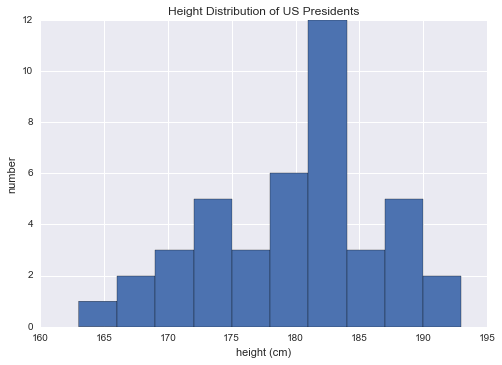

In [18]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.
By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [121]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

If you prefer to sort the array in-place, you can instead use the ``sort`` method of arrays:

In [122]:
x.sort()
print(x)

[1 2 3 4 5]


A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [123]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [124]:
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

In [125]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [126]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [127]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## Broadcasting

Numpy arrays differ from a normal Python list because of their ability to broadcast:

In [128]:
#Setting a value with index range (Broadcasting)
arr[0:5]=100

#Show
arr

array([100, 100, 100, 100, 100,   5,   6,   7,   8,   9])

In [129]:
# Reset array, we'll see why I had to reset in  a moment
arr = np.arange(0,11)

#Show
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [130]:
#Important notes on Slices
slice_of_arr = arr[0:6]

#Show slice
slice_of_arr

array([0, 1, 2, 3, 4, 5])

In [131]:
#Change Slice
slice_of_arr[:]=99

#Show Slice again
slice_of_arr

array([99, 99, 99, 99, 99, 99])

Now note the changes also occur in our original array!

In [132]:
arr

array([99, 99, 99, 99, 99, 99,  6,  7,  8,  9, 10])

When we take a slice or set a variable using assignment, the variable is not copied. Instead we get a view of the original array! This makes memory usage more efficient.

In [133]:
#To get a copy, need to be explicit
arr_copy = arr.copy()

arr_copy

array([99, 99, 99, 99, 99, 99,  6,  7,  8,  9, 10])